# Exercise-3: Support Vector Machines (SVM) [30 points]

This notebook covers the implementation and analysis of Support Vector Machine algorithms for machine learning tasks.

## Learning Objectives
- Understanding SVM algorithms and their mathematical foundations
- Implementing SVMs for classification and regression
- Exploring different kernel functions and their effects
- Hyperparameter tuning for optimal performance
- Analyzing decision boundaries and support vectors
- Handling non-linearly separable data

## Instructions
Complete the exercises below by implementing the required code in the designated cells.

## 1. Import Required Libraries

Import the necessary libraries for SVM implementation and analysis.

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Configure plotting
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

## 2. Load and Preprocess Data

Identical to notebook 2.

In [21]:
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

# 60% train, 20% validation, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## Task 1: Linear SVM

Train a linear SVM (`kernel="linear"`) and evaluate on validation sets (use the
original 5 splits that was created in previous exercise). Report accuracy mean, std
and plot the ROC for each split.

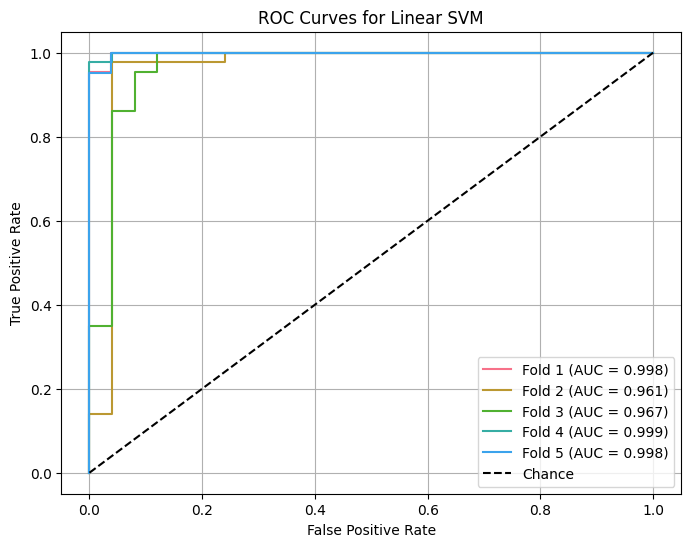

Mean Accuracy: 0.9648 ± 0.0118
Mean AUC: 0.9846 ± 0.0171


In [22]:
from sklearn.model_selection import cross_validate, StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.model_selection import StratifiedKFold

# Define CV strategy and model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
linear_svm = SVC(kernel='linear', probability=True, random_state=42)

accuracies = []
roc_aucs = []

plt.figure(figsize=(8, 6))

for fold, (train_idx, val_idx) in enumerate(cv.split(X_train_scaled, y_train), start=1):
    # Split data
    X_tr, X_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # Train
    linear_svm.fit(X_tr, y_tr)
    
    # Predict
    y_pred = linear_svm.predict(X_val)
    y_pred_proba = linear_svm.predict_proba(X_val)[:, 1]
    
    # Accuracy
    acc = accuracy_score(y_val, y_pred)
    accuracies.append(acc)
    
    # ROC
    fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    roc_aucs.append(roc_auc)
    
    # Plot ROC for this fold
    plt.plot(fpr, tpr, label=f'Fold {fold} (AUC = {roc_auc:.3f})')

# Plot random line
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Linear SVM')
plt.legend()
plt.grid()
plt.show()

print(f"Mean Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
print(f"Mean AUC: {np.mean(roc_aucs):.4f} ± {np.std(roc_aucs):.4f}")

# Task 2: RBF Kernel SVM

Train an Radial Basis Function (RBF) kernel SVM. Compare its performance to the linear kernel using validation accuracy. Plot ROC for these models.

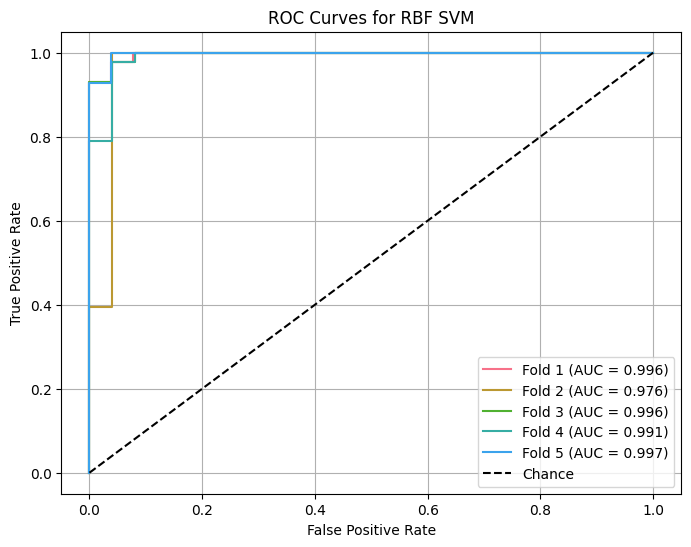

Mean Accuracy: 0.9707 ± 0.0091
Mean AUC: 0.9913 ± 0.0081


In [23]:
from sklearn.metrics.pairwise import rbf_kernel

# Train an Radial Basis Function (RBF) kernel SVM. Compare its performance to the linear kernel using validation accuracy. Plot ROC for these models.

rbf_svm = SVC(kernel='rbf', probability=True, random_state=42)

accuracies_rbf = []
roc_aucs_rbf = []

plt.figure(figsize=(8, 6))

for fold, (train_idx, val_idx) in enumerate(cv.split(X_train_scaled, y_train), start=1):
    # Split data
    X_tr, X_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # Train
    rbf_svm.fit(X_tr, y_tr)

    # Predict
    y_pred = rbf_svm.predict(X_val)
    y_pred_proba = rbf_svm.predict_proba(X_val)[:, 1]

    # Accuracy
    acc = accuracy_score(y_val, y_pred)
    accuracies_rbf.append(acc)

    # ROC
    fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    roc_aucs_rbf.append(roc_auc)

    # Plot ROC for this fold
    plt.plot(fpr, tpr, label=f'Fold {fold} (AUC = {roc_auc:.3f})')

# Plot random line
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for RBF SVM')
plt.legend()
plt.grid()
plt.show()

print(f"Mean Accuracy: {np.mean(accuracies_rbf):.4f} ± {np.std(accuracies_rbf):.4f}")
print(f"Mean AUC: {np.mean(roc_aucs_rbf):.4f} ± {np.std(roc_aucs_rbf):.4f}")

### Hyperparameter Tuning

Experiment with different values of $C$ (regularization strength). Use the validation set to select the best $C$. Report results as a plot of accuracy vs. $C$.

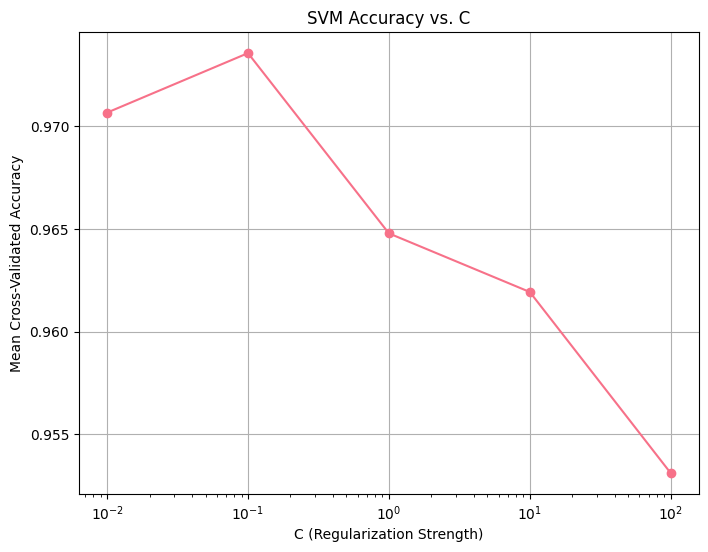

In [ ]:
C_values = [0.01, 0.1, 1, 10, 100]
mean_accuracies = []

for C in C_values:
    svm = SVC(kernel='linear', C=C, probability=True, random_state=42)
    accuracies = cross_val_score(svm, X_train_scaled, y_train, cv=cv, scoring='accuracy')
    mean_accuracies.append(np.mean(accuracies))

# Plot accuracy vs C
plt.figure(figsize=(8, 6))
plt.semilogx(C_values, mean_accuracies, marker='o')
plt.xlabel('C (Regularization Strength)')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.title('SVM Accuracy vs. C')
plt.grid()
plt.show()

We see that as $C$ increases above $10^{-1}$, the performance drops slightly. This is because a larger $C$ value means that the model uses fewer instances as support vectors, which can lead to overfitting on the training data and poorer generalization to unseen data.

Now, we will explore different $\gamma$ (RBF kernel coefficient) values for the SVM. Similar to the $C$ parameter, we will use cross-validation to evaluate the performance of the model with different $\gamma$ values.

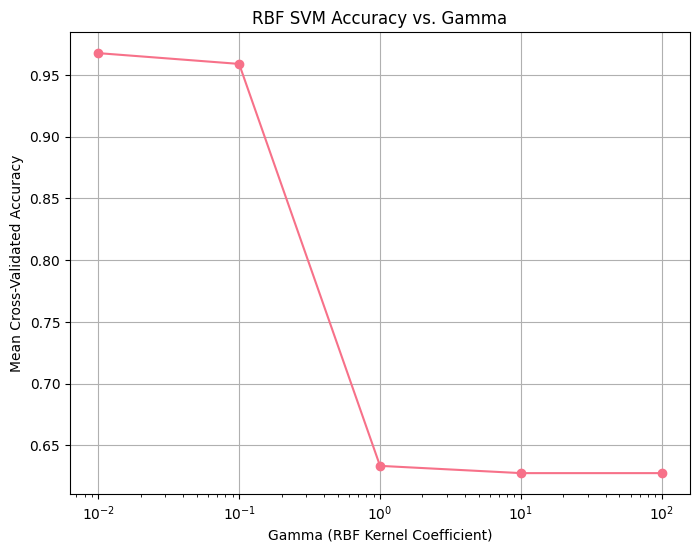

In [28]:
gamma_values = [0.01, 0.1, 1, 10, 100]
mean_accuracies_rbf = []

for gamma in gamma_values:
    svm_rbf = SVC(kernel='rbf', gamma=gamma, probability=True, random_state=42)
    accuracies_rbf = cross_val_score(svm_rbf, X_train_scaled, y_train, cv=cv, scoring='accuracy')
    mean_accuracies_rbf.append(np.mean(accuracies_rbf))

# Plot accuracy vs gamma
plt.figure(figsize=(8, 6))
plt.semilogx(gamma_values, mean_accuracies_rbf, marker='o')
plt.xlabel('Gamma (RBF Kernel Coefficient)')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.title('RBF SVM Accuracy vs. Gamma')
plt.grid()
plt.show()

We observe that the performance of the SVM model drops significantly when $\gamma$ goes from $10^{-1}$ to $10^0$. The reason for this behavior is that a smaller $\gamma$ value leads to a more flexible decision boundary, while a larger $\gamma$ value makes the decision boundary more rigid. When $\gamma$ is too large, the model may overfit the training data, resulting in poor generalization to unseen data.